## 과제 1: 장르별 영화 트렌드 및 흥행 성공 요인 분석
최근 20년간 영화 장르별 트렌드 변화를 분석하고, 각 장르에서 흥행에 성공한 영화들의 공통 요소(예산, 런타임, 출연진, 개봉 시기 등)를 파악하세요.

In [ ]:
import pandas as pd
from IPython.display import display
import warnings
import ast 

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = 'data_processed/kobis_with_credits_ko_genres_exploded.csv'

try:
    df = pd.read_csv(file_path)

    # 🚨 'genres' 컬럼의 문자열을 실제 리스트 객체로 변환합니다.
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # 🚨 'genres' 컬럼을 explode하여 각 장르를 개별 행으로 만듭니다.
    df = df.explode('genres')

    # 1. 2005년 이후 데이터만 필터링
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year
    recent_df = df[df['release_year'] >= 2005].copy()
    
    # 2. release_date에서 월(month) 추출
    recent_df['release_month'] = pd.to_datetime(recent_df['release_date']).dt.month

    # 3. 장르별 수익 상위 25% 영화 추출
    def get_successful_movies(group):
        q3_revenue = group['revenue'].quantile(0.75)
        # 🚨 여기서 각 그룹(장르) 내에서 영화 제목으로 중복을 제거합니다.
        group_no_duplicates = group.drop_duplicates(subset=['title'])
        return group_no_duplicates[group_no_duplicates['revenue'] >= q3_revenue]

    successful_movies_df = recent_df.groupby('genres').apply(get_successful_movies).reset_index(drop=True)

    # 4. 각 장르별로 그룹화하여 display로 출력
    grouped_by_genre = successful_movies_df.groupby('genres')

    print("--- 장르별 흥행 성공 영화 목록 (상위 5개) ---")

    for genre, group_df in grouped_by_genre:
        print(f"\n✅ 장르: {genre}")
        # 🚨 display 전에 다시 한번 중복 제거 (get_successful_movies 함수에 이미 적용됨)
        # display에 보여줄 때만 `head(5)`를 사용합니다.
        display(group_df[['title', 'revenue', 'audience_total', 'runtime', 'cast_names_ko', 'release_month']].head())
    
except FileNotFoundError:
    print(f"\n오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요.")
except KeyError as e:
    print(f"\n오류: {e} 컬럼이 DataFrame에 없습니다. 컬럼명을 다시 확인해주세요.")

--- 장르별 흥행 성공 영화 목록 (상위 5개) ---

✅ 장르: SF


,title,revenue,audience_total,runtime,cast_names_ko,release_month
0,괴물,6.656903e+10,10892305.0,119.0,송강호|변희봉|박해일|배두나|고아성,7
1,7광구,1.926371e+10,2225436.0,101.0,하지원|박철민|이한위|오지호|송새벽,8
2,연가시,3.206548e+10,4499856.0,109.0,김명민|문정희|김동완|이하늬|강신일,7
3,설국열차,6.681845e+10,9321959.0,125.0,크리스 에반스|송강호|에드 해리스|존 허트|틸다 스윈튼,8



✅ 장르: 가족


,title,revenue,audience_total,runtime,cast_names_ko,release_month
4,맨발의 기봉이,1.214021e+10,1988117.0,100.0,신현준|임하룡|탁재훈|김수미|김효진,4
5,괴물,6.656903e+10,10892305.0,119.0,송강호|변희봉|박해일|배두나|고아성,7
6,마이 파더,5.330582e+09,834630.0,105.0,김영철|다니엘 헤니|김인권|이건문|안석환,9
7,친정엄마,3.221876e+09,454746.0,108.0,김해숙|박진희|정현주|조영진|박준호,4
8,파파,3.864042e+09,566746.0,116.0,박용우|고아라|손병호|정명숙|최경선,2



✅ 장르: 공연


,title,revenue,audience_total,runtime,cast_names_ko,release_month
12,러브 유어셀프 인 서울,3.209683e+09,342366.0,111.0,김남준|김석진|민윤기|정호석|박지민,1
13,"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",2.909954e+09,94361.0,80.0,김호중,9
14,아임 히어로 더 파이널,5.563727e+09,230181.0,102.0,임영웅,3
15,아이유 콘서트 : 더 골든 아워,1.573554e+09,66926.0,170.0,이지은,9
16,임영웅│아임 히어로 더 스타디움,9.801282e+09,346289.0,108.0,임영웅,8



✅ 장르: 공포(호러)


,title,revenue,audience_total,runtime,cast_names_ko,release_month
18,극락도 살인사건,1.329444e+10,2074312.0,112.0,박해일|박솔미|성지루|김광수|유혜정,4
19,검은 집,8.806455e+09,1316488.0,103.0,황정민|유선|강신일|김혜정|유승목,6
20,고死 : 피의 중간고사,1.027012e+10,1629264.0,85.0,이범수|남규리|김범|윤정희|권현상,8
21,박쥐,1.479721e+10,2199378.0,133.0,송강호|김옥빈|신하균|김해숙|송영창,4
22,오싹한 연애,2.159157e+10,2952858.0,114.0,손예진|이민기|신동훈|조아라|이현진,12



✅ 장르: 기타


,title,revenue,audience_total,runtime,cast_names_ko,release_month
31,더 테러 라이브,3.984740e+10,5580701.0,97.0,하정우|이경영|전혜진|이다윗|김홍파,7



✅ 장르: 다큐멘터리


,title,revenue,audience_total,runtime,cast_names_ko,release_month
32,워낭소리,1.865210e+10,2845331.0,77.0,최원균|이삼순|김민자|최종만|최종민,1
33,"울지마, 톤즈",2.108957e+09,367683.0,91.0,이금희,9
34,"님아, 그 강을 건너지 마오",3.697134e+10,4746458.0,85.0,조병만|강계열,11
35,노무현입니다,1.447037e+10,1842323.0,109.0,노무현|이상호,5
36,공범자들,1.634900e+09,206599.0,105.0,이명박|김재철|김장겸|고대영,8



✅ 장르: 드라마


,title,revenue,audience_total,runtime,cast_names_ko,release_month
44,공공의 적 2,2.002252e+10,3123600.0,149.0,설경구|정준호|유해진|강경덕|박웅,1
45,말아톤,2.603461e+10,4155296.0,117.0,조승우|김미숙|이기영|백성현|안내상,1
46,박수칠 때 떠나라,1.311863e+10,2063656.0,115.0,차승원|신하균|김지수|박정아|조정진,8
47,웰컴 투 동막골,4.018094e+10,6413223.0,133.0,신하균|정재영|강혜정|리민|류덕환,8
48,왕의 남자,6.586641e+10,10489308.0,119.0,감우성|이준기|유해진|정진영|강성연,12



✅ 장르: 멜로/로맨스


,title,revenue,audience_total,runtime,cast_names_ko,release_month
181,연애의 목적,9.639268e+09,1493211.0,121.0,강혜정|박해일|이은숙|이대연|박그리나,6
182,너는 내 운명,1.738289e+10,2659825.0,121.0,전도연|황정민|나문희|서주희|윤제문,9
183,내 생애 가장 아름다운 일주일,1.457610e+10,2269939.0,129.0,황정민|엄정화|김유정|김윤석|진태현,10
184,구세주,1.003218e+10,1612280.0,104.0,최성국|신이|김수미|박준규|이상현,2
185,청춘만화,9.671450e+09,1549089.0,116.0,권상우|김하늘|이상우|강기화|이영철,3



✅ 장르: 뮤지컬


,title,revenue,audience_total,runtime,cast_names_ko,release_month
224,가루지기,1.620189e+09,245857.0,120.0,봉태규|김예원|박영서|김영애|오달수,4
225,인생은 아름다워,1.079399e+10,1158887.0,122.0,류승룡|염정아|박세완|옹성우|심달기,9
226,영웅,3.191558e+10,3230573.0,120.0,정성화|김고은|나문희|조재윤|배정남,12



✅ 장르: 미스터리


,title,revenue,audience_total,runtime,cast_names_ko,release_month
227,박수칠 때 떠나라,1.311863e+10,2063656.0,115.0,차승원|신하균|김지수|박정아|조정진,8
228,극락도 살인사건,1.329444e+10,2074312.0,112.0,박해일|박솔미|성지루|김광수|유혜정,4
229,궁녀,8.909668e+09,1339015.0,118.0,박진희|윤세아|류정아|임정은|서영희,10
230,그림자 살인,1.244203e+10,1859624.0,111.0,황정민|류덕환|오달수|엄지원|박진우,4
231,화차,1.832749e+10,2418592.0,117.0,이선균|김민희|조성하|송하윤|차수연,3



✅ 장르: 범죄


,title,revenue,audience_total,runtime,cast_names_ko,release_month
246,추격자,3.389918e+10,5033022.0,123.0,김윤석|하정우|서영희|박효주|김유정,2
247,7급 공무원,2.617418e+10,4002500.0,112.0,김하늘|강지환|임성현|유승목|강규영,4
248,거북이 달린다,2.057350e+10,3017903.0,117.0,김윤석|정경호|견미리|선우선|최수현,6
249,부당거래,2.096473e+10,2718611.0,119.0,황정민|류승범|천호진|김승훈|유해진,10
250,범죄와의 전쟁: 나쁜놈들 전성시대,3.625847e+10,4682529.0,133.0,최민식|하정우|조진웅|마동석|곽도원,2



✅ 장르: 사극


,title,revenue,audience_total,runtime,cast_names_ko,release_month
281,최종병기 활,5.578002e+10,7463056.0,122.0,박해일|류승룡|김무열|문채원|이한위,8
282,바람과 함께 사라지다,3.454249e+10,4898495.0,121.0,차태현|오지호|민효린|성동일|고창석,8
283,"광해, 왕이 된 남자",8.862082e+10,12274154.0,131.0,이병헌|류승룡|한효주|장광|김인권,9
284,관상,6.591471e+10,9121108.0,139.0,송강호|이정재|백윤식|조정석|이종석,9
285,군도: 민란의 시대,3.674397e+10,4741281.0,137.0,하정우|강동원|조진웅|마동석|정만식,7



✅ 장르: 서부극(웨스턴)


,title,revenue,audience_total,runtime,cast_names_ko,release_month
293,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,송강호|이병헌|정우성|엄지원|오일용,7



✅ 장르: 스릴러


,title,revenue,audience_total,runtime,cast_names_ko,release_month
294,친절한 금자씨,2.021563e+10,3079279.0,112.0,이영애|최민식|권예영|김시후|남일우,7
295,"달콤, 살벌한 연인",1.334609e+10,2065433.0,110.0,박용우|최강희|이광우|조은지|정경호,4
296,그놈 목소리,1.724216e+10,2911117.0,122.0,설경구|김남주|강동원|김영철|송영창,2
297,극락도 살인사건,1.329444e+10,2074312.0,112.0,박해일|박솔미|성지루|김광수|유혜정,4
298,세븐 데이즈,1.353440e+10,2020299.0,125.0,김윤진|김미숙|박희순|최무성|장항선,11



✅ 장르: 애니메이션


,title,revenue,audience_total,runtime,cast_names_ko,release_month
334,마당을 나온 암탉,1.343974e+10,2021416.0,93.0,문소리|박철민|최민식|유승호|김상현,7
335,점박이:한반도의 공룡3D,8.978200e+09,967168.0,88.0,이형석|신용우|구자형,1
336,뽀로로 극장판 슈퍼썰매 대모험,6.368320e+09,867148.0,77.0,이선|이미자|김환진|함수정|홍소영,1
337,뽀로로 극장판 공룡섬 대모험,6.140841e+09,812674.0,78.0,이선|이미자|함수정|홍소영|정미숙,12
338,신비아파트: 금빛 도깨비와 비밀의 동굴,4.925114e+09,667879.0,67.0,조현정|김영은|김채하|신용우|여민정,7



✅ 장르: 액션


,title,revenue,audience_total,runtime,cast_names_ko,release_month
352,디워,4.933355e+10,7854274.0,90.0,브룩스 아만다|베어 제이슨,8
353,추격자,3.389918e+10,5033022.0,123.0,김윤석|하정우|서영희|박효주|김유정,2
354,강철중: 공공의 적 1-1,2.862218e+10,4310578.0,127.0,설경구|정재영|김영필|강신일|유해진,6
355,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,송강호|이병헌|정우성|엄지원|오일용,7
356,신기전,2.422619e+10,3710813.0,134.0,정재영|한은정|허준호|안성기|김명수,9



✅ 장르: 어드벤처


,title,revenue,audience_total,runtime,cast_names_ko,release_month
408,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,송강호|이병헌|정우성|엄지원|오일용,7
409,해운대,8.069220e+10,11276049.0,129.0,설경구|하지원|박중훈|엄정화|이민기,7
410,감기,2.171164e+10,3107800.0,121.0,장혁|수애|박민하|남문철|유해진,8
411,해적: 바다로 간 산적,6.618997e+10,8625574.0,129.0,김남길|손예진|신정근|유해진|이경영,8
412,조선명탐정 : 사라진 놉의 딸,3.017267e+10,3832898.0,124.0,김명민|오달수|이연희|조관우|정원중,2



✅ 장르: 전쟁


,title,revenue,audience_total,runtime,cast_names_ko,release_month
415,웰컴 투 동막골,4.018094e+10,6413223.0,133.0,신하균|정재영|강혜정|리민|류덕환,8
416,신기전,2.422619e+10,3710813.0,134.0,정재영|한은정|허준호|안성기|김명수,9
417,포화속으로,2.369803e+10,3307797.0,120.0,차승원|권상우|최승현|김승우|문재원,6
418,인천상륙작전,5.499344e+10,7033357.0,110.0,이정재|이범수|리암 니슨|진세연|정준호,7



✅ 장르: 코미디


,title,revenue,audience_total,runtime,cast_names_ko,release_month
419,마파도,1.663338e+10,2618070.0,107.0,김수미|여운계|이정진|이문식|오달수,3
420,박수칠 때 떠나라,1.311863e+10,2063656.0,115.0,차승원|신하균|김지수|박정아|조정진,8
421,가문의 위기,2.848571e+10,4508292.0,115.0,신현준|김수미|김원희|정준하|최은주,9
422,광식이 동생 광태,1.276858e+10,2018197.0,104.0,김주혁|봉태규|이요원|김아중|정경호,11
423,투사부일체,3.147477e+10,4997745.0,125.0,정준호|정웅인|김상중|박용식|최윤영,1



✅ 장르: 판타지


,title,revenue,audience_total,runtime,cast_names_ko,release_month
495,디워,4.933355e+10,7854274.0,90.0,브룩스 아만다|베어 제이슨,8
496,전우치,4.378833e+10,6022722.0,136.0,강동원|임수정|김윤석|유해진|김시권,12
497,늑대소년,4.640984e+10,6627275.0,124.0,송중기|박보영|장영남|유연석|김향기,10
498,뷰티 인사이드,1.604508e+10,2039642.0,126.0,한효주|김대명|도지한|배성우|박신혜,8
499,신과함께-죄와 벌,1.156022e+11,14398110.0,139.0,하정우|차태현|주지훈|김향기|김동욱,12


In [1]:
import pandas as pd
from IPython.display import display
import ast

# 파일 경로
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# 데이터 로드
try:
    df = pd.read_csv(PATH_EXP)
except FileNotFoundError:
    print(f"오류: '{PATH_EXP}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()

# 🚨 'genres' 컬럼의 문자열을 리스트 객체로 변환
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 🚨 'genres' 컬럼을 explode하여 각 리스트 아이템을 개별 행으로 분리
df_exploded = df.explode('genres')

# 1. 'genres' 컬럼으로 장르별 영화 개수 계산
genre_counts_df = (df_exploded.groupby("genres")["movie_id"]
                   .nunique()
                   .sort_values(ascending=False)
                   .reset_index())

genre_counts_df.columns = ['장르', '영화_개수']

# 2. 결과 출력
print("--- 장르별 영화 개수 데이터프레임 ---")
display(genre_counts_df)

--- 장르별 영화 개수 데이터프레임 ---


,장르,영화_개수
0,드라마,565
1,코미디,307
2,액션,222
3,멜로/로맨스,175
4,스릴러,163
5,범죄,132
6,애니메이션,77
7,공포(호러),74
8,미스터리,71
9,사극,47


In [ ]:
import pandas as pd
from IPython.display import display
import ast

# 파일 경로
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# 데이터 로드
try:
    df = pd.read_csv(PATH_EXP)
except FileNotFoundError:
    print(f"오류: '{PATH_EXP}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()

# 🚨 문자열 리스트를 실제 리스트로 변환 후 explode
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.explode('genres')

# 1. 'genres' 컬럼으로 장르별 영화 개수 계산
genre_counts_df = (df.groupby("genres")["movie_id"]
                   .nunique()
                   .sort_values(ascending=False)
                   .reset_index())

genre_counts_df.columns = ['장르', '영화_개수']

# 2. 영화 개수가 10개 초과인 장르와 이하인 장르로 분리
over_10 = genre_counts_df[genre_counts_df['영화_개수'] > 10]
under_10 = genre_counts_df[genre_counts_df['영화_개수'] <= 10]

# 3. '기타' 항목 생성 및 포함된 장르명 추가
other_count = under_10['영화_개수'].sum()
other_genres = ', '.join(under_10['장르'])
other_row = pd.DataFrame([['기타 (' + other_genres + ')', other_count]], columns=['장르', '영화_개수'])

# 4. 두 데이터프레임 합치기
final_counts_df = pd.concat([over_10, other_row], ignore_index=True)

print("--- 장르별 영화 개수 데이터프레임 (10개 이하 장르가 '기타'로 통합) ---")
display(final_counts_df)

--- 장르별 영화 개수 데이터프레임 (10개 이하 장르가 '기타'로 통합) ---


,장르,영화_개수
0,드라마,565
1,코미디,307
2,액션,222
3,멜로/로맨스,175
4,스릴러,163
5,범죄,132
6,애니메이션,77
7,공포(호러),74
8,미스터리,71
9,사극,47


### **2005-2025 장르별 개봉 편수 비율 (편수가 10개 이하인 영화들은 '기타'로 통합)**
**--> 기타 (기타, 뮤지컬, 서부극(웨스턴))**

### **장르별 평균 흥행 지표 비교(상위 10개 장르)**
**--> 평균 수익, 평균 관객수, 평균 런타임**

### **장르별 흥행 영화의 개봉 계절 분포 시각화**

### **흥행 영화 장르 별 평점 분포**
**--> 아직 평점 추가 안 해서 못했댜**


--- 장르별 개봉 편수 파이 차트 시각화 ---


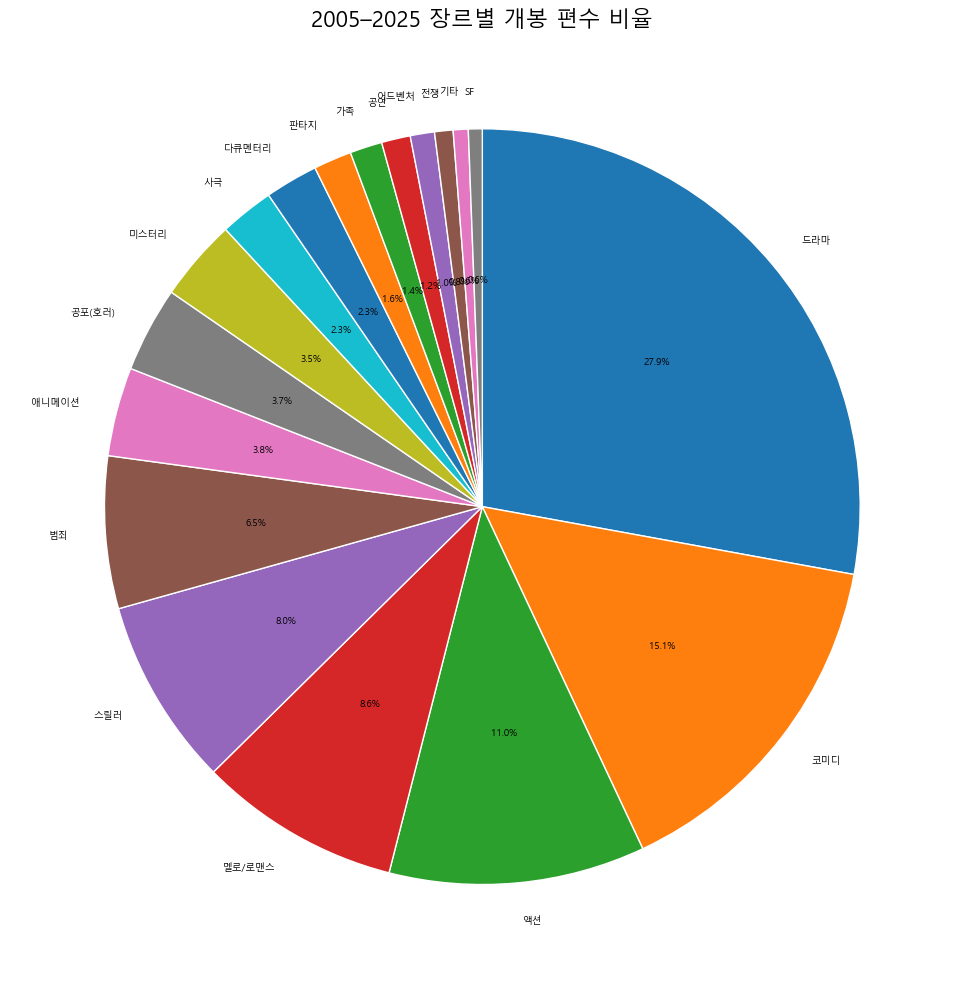


--- 장르별 평균 흥행 지표 시각화 ---


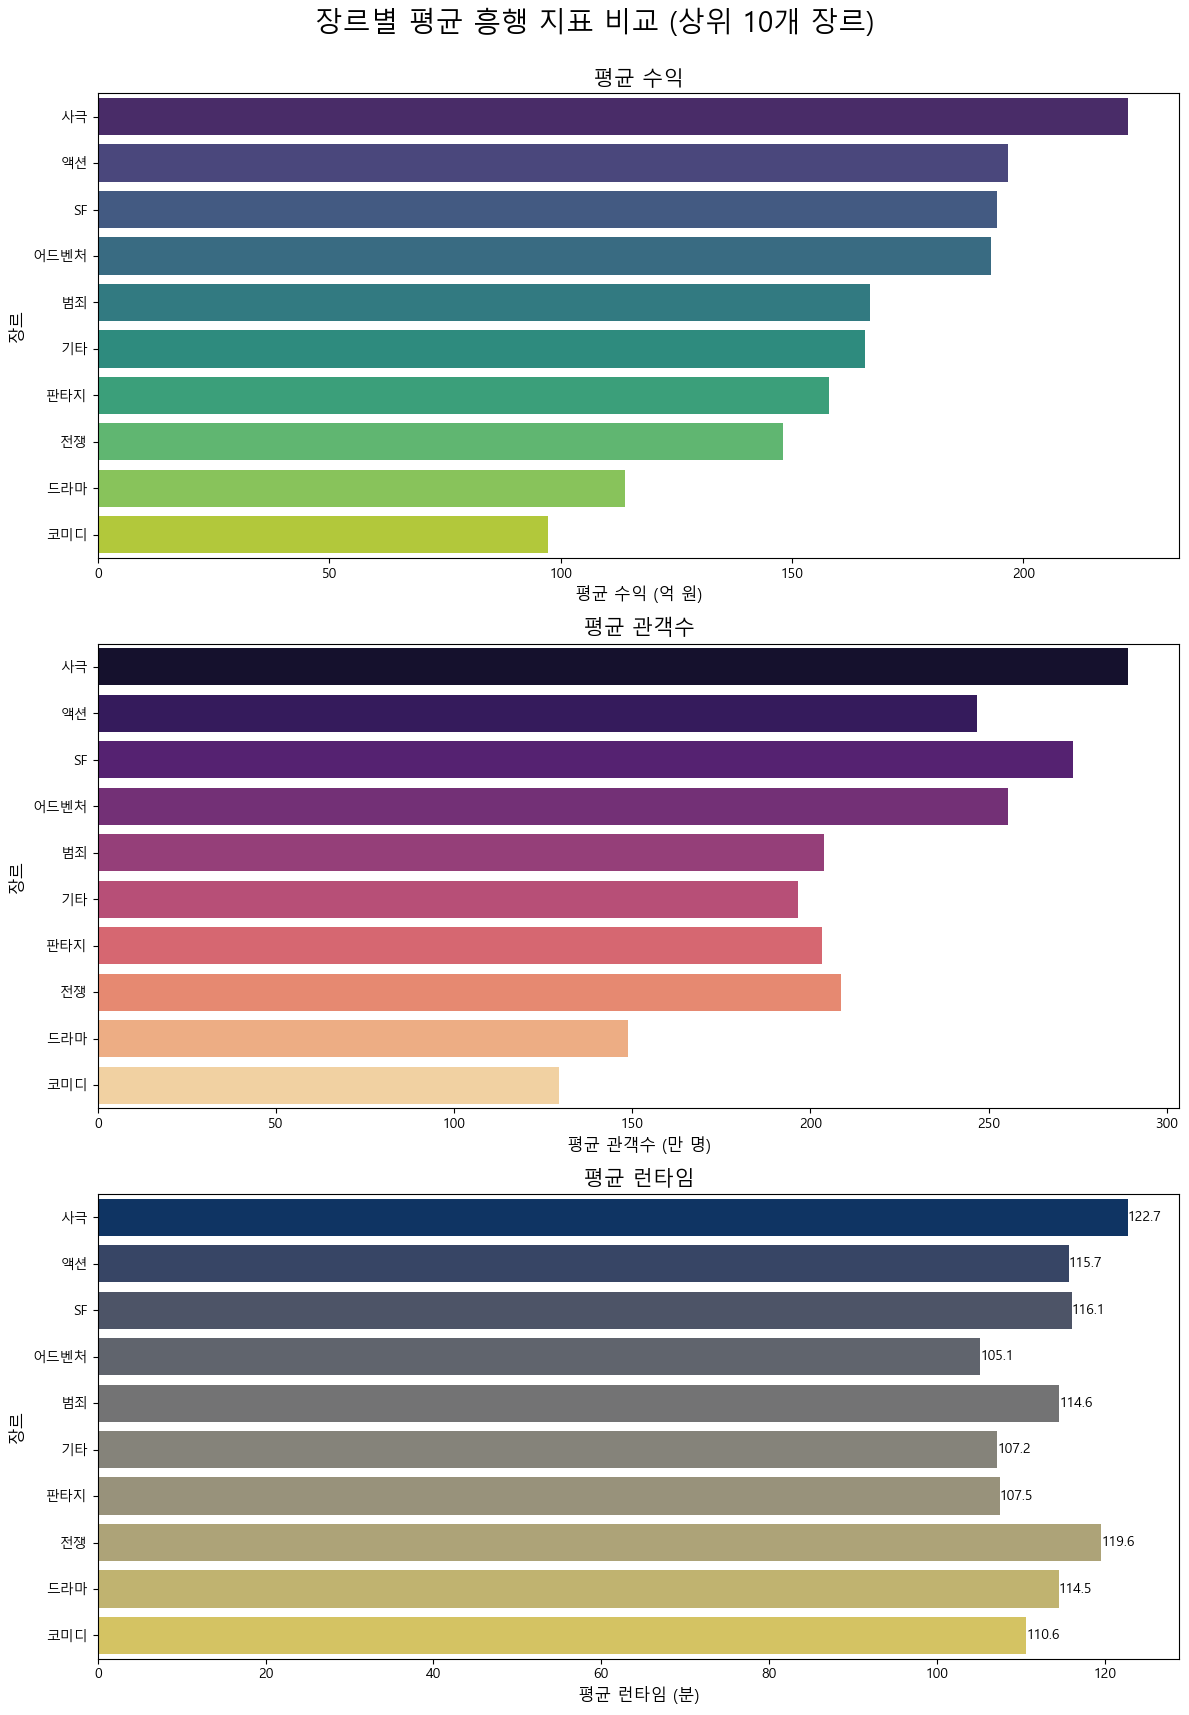


--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---


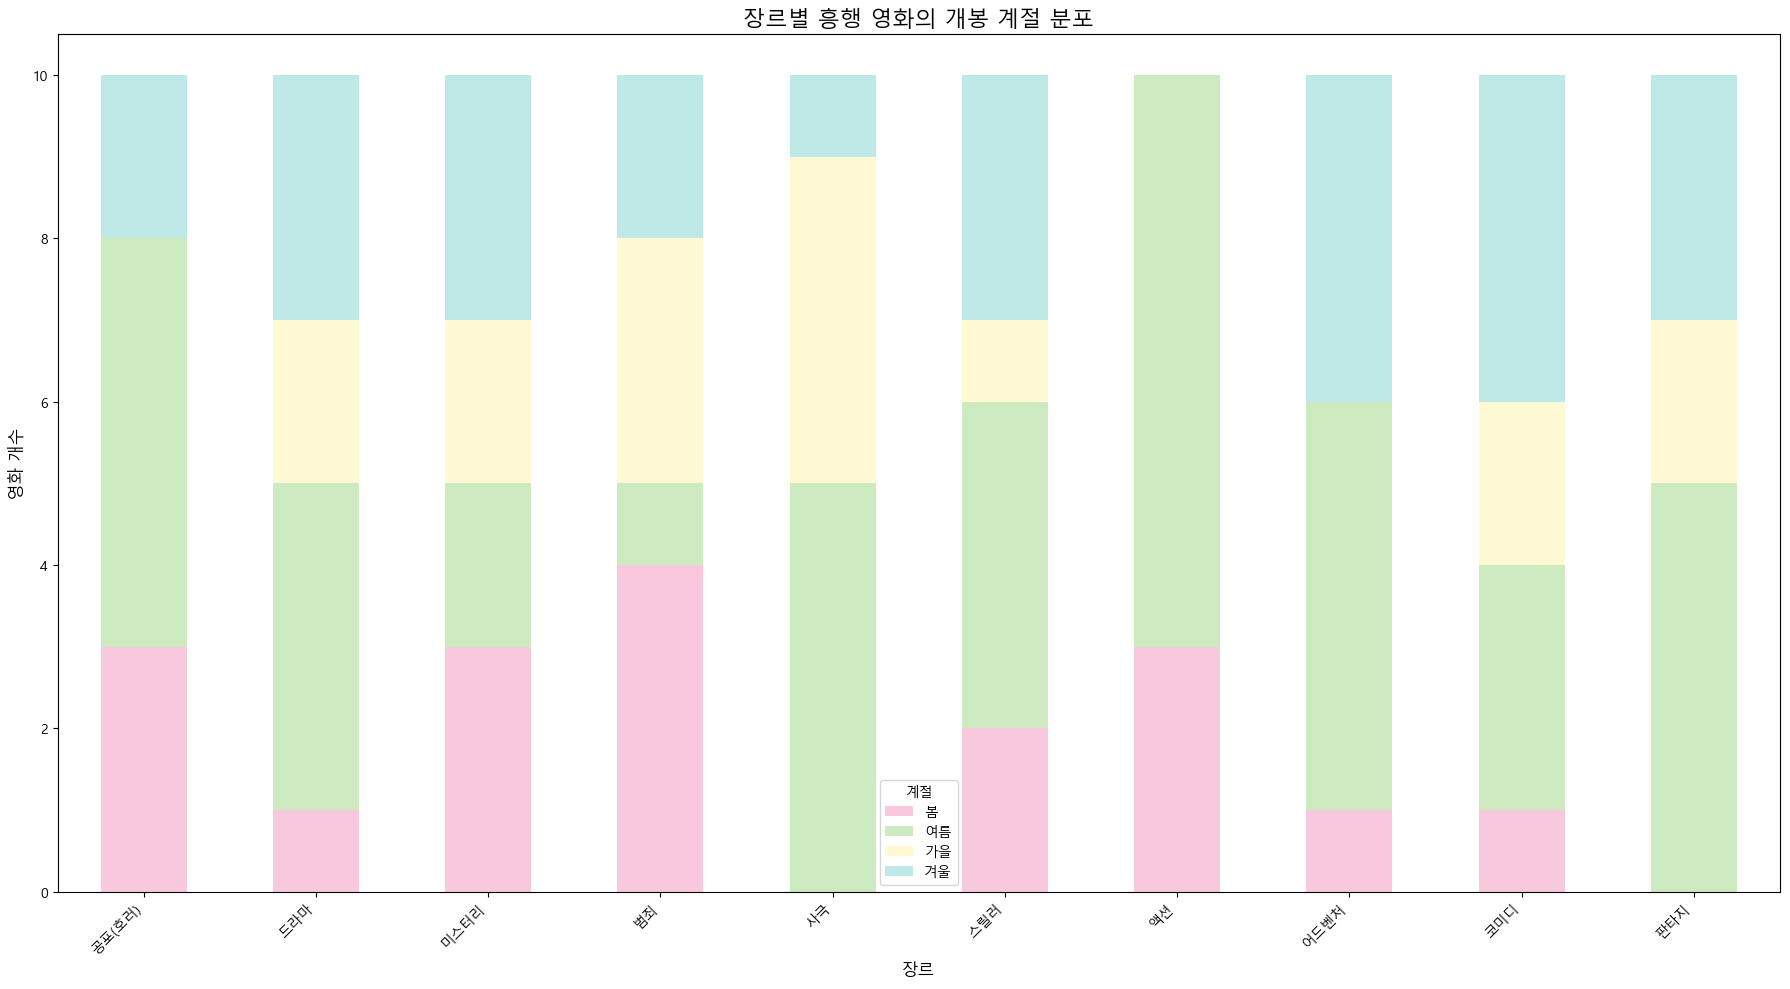


--- 흥행 영화 장르 별 평점 분포 ---


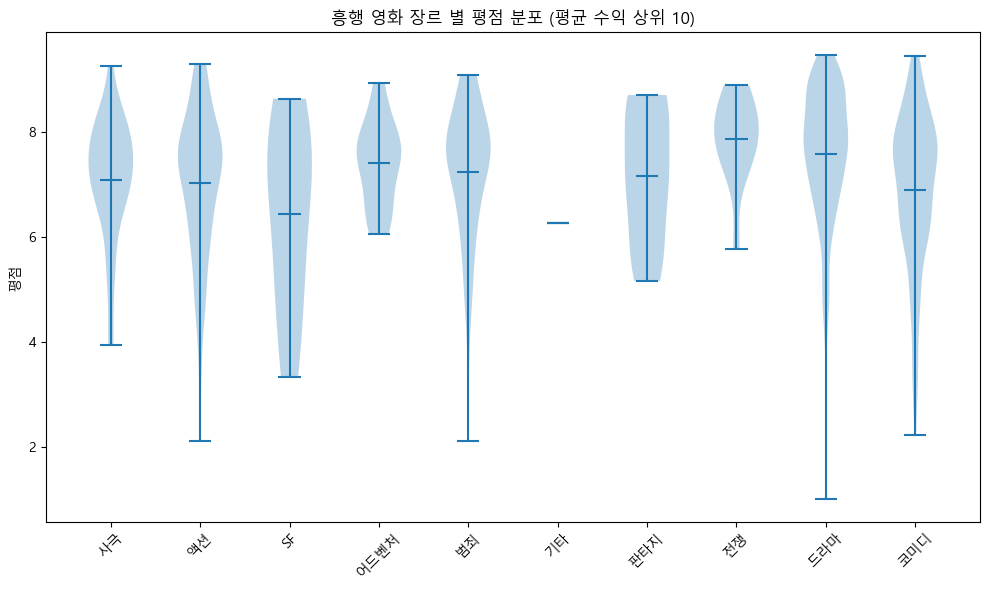

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# 경고 메시지 무시 설정 및 폰트 설정
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로 (첫 번째 코드 블록의 경로 사용)
PATH_EXP = "data_processed/kobis_with_naver_ratings.csv"

# ======================================================
# 데이터 로드 및 전처리
# ======================================================
try:
    df = pd.read_csv(PATH_EXP)

    # 문자열 리스트를 실제 리스트로 변환 후 explode
    # ast.literal_eval을 사용해도 오류가 발생하면, df['genres'].str.split(', ')로 변경
    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    df_exploded = df.explode('genres')
    
    # 'release_date'의 월을 기반으로 'season' 컬럼 생성
    df_exploded['season'] = pd.to_datetime(df_exploded['release_date']).dt.month.apply(lambda month: '봄' if month in [3, 4, 5] else '여름' if month in [6, 7, 8] else '가을' if month in [9, 10, 11] else '겨울')
    
    # 장르가 없는 행 제거
    df_exploded.dropna(subset=['genres'], inplace=True)

    # ======================================================
    # 1. 장르별 개봉 편수 파이 차트 (★'기타' 항목 포함)
    # ======================================================
    print("\n--- 장르별 개봉 편수 파이 차트 시각화 ---")

    genre_counts = (df_exploded.groupby("genres")["movie_id"]
                    .nunique()
                    .sort_values(ascending=False))
    
    under_10 = genre_counts[genre_counts <= 10]
    over_10 = genre_counts[genre_counts > 10]

    other_count = under_10.sum()
    final_counts = pd.concat([over_10, pd.Series([other_count], index=['기타'])])
    final_counts = final_counts.sort_values(ascending=False)

    plt.figure(figsize=(10, 10))
    plt.pie(
        final_counts.values,
        labels=final_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor="white"),
        textprops={'fontsize': 7}
    )
    plt.title("2005–2025 장르별 개봉 편수 비율", fontsize=16)
    plt.tight_layout()
    plt.show()

    # ======================================================
    # 2. 장르별 평균 흥행 지표 시각화 (막대 그래프)
    # ======================================================
    print("\n--- 장르별 평균 흥행 지표 시각화 ---")

    # 🚨 df_exploded를 사용해 개별 장르의 흥행 지표 계산
    success_factors = df_exploded.groupby('genres').agg(
        average_revenue=('revenue', 'mean'),
        average_audience=('audience_total', 'mean'),
        average_runtime=('runtime', 'mean'),
        movie_count=('title', 'count')
    ).reset_index()

    success_factors = success_factors[success_factors['movie_count'] >= 5]
    top_10_by_revenue = success_factors.sort_values(by='average_revenue', ascending=False).head(10)

    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)
    fig.suptitle('장르별 평균 흥행 지표 비교 (상위 10개 장르)', fontsize=20, y=0.95)

    sns.barplot(x='average_revenue', y='genres', data=top_10_by_revenue, ax=axes[0], palette='viridis', hue='genres', legend=False)
    axes[0].set_title('평균 수익', fontsize=15)
    axes[0].set_xlabel('평균 수익 (억 원)', fontsize=12)
    axes[0].set_ylabel('장르', fontsize=12)
    axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/100000000:,.0f}'))

    sns.barplot(x='average_audience', y='genres', data=top_10_by_revenue, ax=axes[1], palette='magma', hue='genres', legend=False)
    axes[1].set_title('평균 관객수', fontsize=15)
    axes[1].set_xlabel('평균 관객수 (만 명)', fontsize=12)
    axes[1].set_ylabel('장르', fontsize=12)
    axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/10000:,.0f}'))

    sns.barplot(x='average_runtime', y='genres', data=top_10_by_revenue, ax=axes[2], palette='cividis', hue='genres', legend=False)
    axes[2].set_title('평균 런타임', fontsize=15)
    axes[2].set_xlabel('평균 런타임 (분)', fontsize=12)
    axes[2].set_ylabel('장르', fontsize=12)
    for container in axes[2].containers:
        axes[2].bar_label(container, fmt='%.1f')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # ======================================================
    # 3. 장르별 흥행 영화의 개봉 계절 분포 시각화
    # ======================================================
    print("\n--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---")

    genre_counts_filtered = df_exploded['genres'].value_counts()
    valid_genres = genre_counts_filtered[genre_counts_filtered >= 5].index
    df_filtered_genres = df_exploded[df_exploded['genres'].isin(valid_genres)]

    top_movies_per_genre = df_filtered_genres.sort_values(by='revenue', ascending=False).groupby('genres').head(10).reset_index(drop=True)

    top_10_genres_with_movies = top_movies_per_genre['genres'].value_counts().nlargest(10).index
    final_df_season = top_movies_per_genre[top_movies_per_genre['genres'].isin(top_10_genres_with_movies)]

    genre_season_counts = final_df_season.groupby(['genres', 'season']).size().unstack(fill_value=0)
    genre_season_counts = genre_season_counts[['봄', '여름', '가을', '겨울']]

    seasonal_colors = ['#F8C8DC', '#CDEAC0', '#FFFAD4', '#BEE9E6']

    genre_season_counts.plot(kind='bar', figsize=(18, 10), stacked=True, color=seasonal_colors)
    plt.title('장르별 흥행 영화의 개봉 계절 분포', fontsize=16)
    plt.xlabel('장르', fontsize=12)
    plt.ylabel('영화 개수', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='계절', fontsize=10)
    plt.tight_layout()
    plt.show()

    # ======================================================
    # 4. 흥행 영화 장르의 평점 분포 (바이올린)
    # ======================================================
    print("\n--- 흥행 영화 장르 별 평점 분포 ---")
    
    hit_genres = top_10_by_revenue['genres'].tolist() 
    sel = hit_genres

    data = [df_exploded.loc[df_exploded["genres"]==g, "vote_average_naver"].dropna() for g in sel]
    plt.figure(figsize=(10,6))
    plt.violinplot(data, showmeans=True)
    plt.xticks(range(1, len(sel)+1), sel, rotation=45)
    plt.title("흥행 영화 장르 별 평점 분포 (평균 수익 상위 10)")
    plt.ylabel("평점")
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\n오류: '{PATH_EXP}' 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요.")
except KeyError as e:
    print(f"\n오류: {e} 컬럼이 DataFrame에 없습니다. 컬럼명을 다시 확인해주세요.")